# Introducción a la Ciencia de Datos: Tarea 1

Este notebook contiene el código de base para realizar la Tarea 1 del curso. Puede copiarlo en su propio repositorio y trabajar sobre el mismo.
Las **instrucciones para ejecutar el notebook** están en la [página inicial del repositorio](https://gitlab.fing.edu.uy/maestria-cdaa/intro-cd).

Se utiliza el lenguaje Python y la librería Pandas. Si no tiene ninguna familiaridad con la librería, se recomienda realizar algún tutorial introductorio (ver debajo).
También se espera que los alumnos sean proactivos a la hora de consultar las documentaciones de las librerías y del lenguaje, para entender el código provisto.
Además de los recursos provistos en la [página del curso](https://eva.fing.edu.uy/course/view.php?id=1378&section=1), los siguientes recursos le pueden resultar interesantes:
 - [Pandas getting started](https://pandas.pydata.org/docs/getting_started/index.html#getting-started) y [10 minutes to pandas](https://pandas.pydata.org/docs/user_guide/10min.html): Son parte de la documentación en la página oficial de Pandas.
 - [Kaggle Learn](https://www.kaggle.com/learn): Incluye tutoriales de Python y Pandas.


Si desea utilizar el lenguaje R y está dispuesto a no utilizar (o traducir) este código de base, también puede hacerlo.

En cualquier caso, **se espera que no sea necesario revisar el código para corregir la tarea**, ya que todos los resultados y análisis relevantes deberían estar en el **informe en formato PDF**.

## Cargar bibliotecas (dependencias)
Recuerde instalar los requerimientos (`requirements.txt`) en el mismo entorno donde está ejecutando este notebook (ver [README](https://github.com/DonBraulio/introCD)).

In [199]:
from time import time
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import re

## Lectura de Datos

In [201]:
# DataFrame con todos los discursos:
df_speeches = pd.read_csv('../data/us_2020_election_speeches.csv')

In [202]:
# Chequear si existen NaNs
df_speeches.isna().any().any()  # Da como reusltado True o False dependiendo si el DataFrame posee NaNs entre sus datos.
# Localiar los NaNs dentro del DataFrame
print(df_speeches.isna().sum())
df_speeches[df_speeches.isna().any(axis=1)] # Filtra y devuelve solo las filas que poseen por los menos un NaN.

# Analizar otras formas de datos faltantes
sospechosos = ["???", "-", "N/A", "missing", ""]  # Posibles formas que podrían aparecer como datos faltantes
df_speeches[df_speeches.isin(sospechosos).any(axis=1)] #Analizo otras formas de datos faltantes



speaker      3
title        0
text         0
date         0
location    18
type        21
dtype: int64


,speaker,title,text,date,location,type
194,???,Joe Biden & Trump Surrogates Hold Town Hall fo...,"Vicky Nguyen: (08:06)\r\nHi, everyone. I’m inv...","Jun 27, 2020",NaN,NaN


# Parte 1: Cargado y Limpieza de Datos

## Exploración de Datos

In [203]:
# TODO: Analice la cantidad de discursos por candidato

# Tome los 5 candidatos con más discursos
df_speeches_top_5 = df_speeches['speaker'].value_counts().head(5)  # Analizo el número de apariciones de cada candidato en mi DataFrame y me quedo con el top 5.
print(df_speeches_top_5)   # 5 candidatos con más discursos.
# DataFrame con los datos de los 5 candidatos con más discursos
df_speeches_top_5_df = df_speeches[df_speeches['speaker'].isin(df_speeches_top_5.index)] #Creo un DataFrame que posea únicamente los discursos de los 5 candidatos con más discursos.
df_speeches_top_5_df

speaker
Joe Biden         71
Donald Trump      53
Mike Pence        19
Bernie Sanders    16
Kamala Harris     11
Name: count, dtype: int64


,speaker,title,text,date,location,type
1,Joe Biden,"Joe Biden Southfield, MI Speech on Health Care...","Joe Biden: (00:00)\r\nHello, Michigan. Hi, how...","Oct 16, 2020","Southfield ,Michigan",Campaign Speech
2,Donald Trump,Donald Trump Speech Transcript ‘Protecting Ame...,President Trump: (00:30)\r\nThank you. What a ...,"Oct 16, 2020","Fort Myers, Florida",Campaign Speech
3,Joe Biden,Joe Biden ABC Town Hall Transcript October 15,"George Stephanopoulos: (00:41)\r\nHey, and wel...","Oct 15, 2020",ABC,Town Hall
4,Donald Trump,Donald Trump NBC Town Hall Transcript October 15,Savannah Guthrie: (03:50)\r\nIt’s nothing but ...,"Oct 15, 2020",NBC,Town Hall
5,Donald Trump,"Donald Trump Campaign Rally Greenville, NC Tra...",Donald Trump: (01:25)\r\nThank you very much. ...,"Oct 15, 2020","Greenville, North Carolina",Campaign Speech
...,...,...,...,...,...,...
257,Donald Trump,Donald Trump New Hampshire Rally Transcript Fe...,"Donald Trump: (02:41)\r\nHello, Manchester, an...","Feb 10, 2020",New Hampshire,Campaign Speech
260,Bernie Sanders,Bernie Sanders New Hampshire Town Hall Transcript,Bernie Sanders: (00:00)\r\nThank you. Thank yo...,"Feb 10, 2020",New Hampshire,Town Hall
264,Bernie Sanders,Bernie Sanders Speech Transcript: Sanders Spea...,Bernie Sanders: (00:00)\r\nJust want to take t...,"Feb 6, 2020",Iowa,Campaign Speech
266,Donald Trump,Donal Trump Iowa Rally Transcript: Trump Holds...,Donald Trump: (00:24)\r\nI worked so hard for ...,"Jan 30, 2020","Des Moines, Iowa",Campaign Speech


## Visualizaciones

                Jan  Feb  Mar  Apr  May  Jun  Jul  Ago  Sep  Oct
speaker                                                         
Bernie Sanders  NaN  4.0  6.0  2.0  NaN  NaN  NaN  NaN    1    2
Donald Trump    2.0  5.0  1.0  NaN  1.0  2.0  1.0  NaN   24   10
Joe Biden       NaN  3.0  7.0  4.0  5.0  4.0  9.0  NaN   20   14
Kamala Harris   NaN  NaN  1.0  NaN  NaN  NaN  1.0  NaN    6    1
Mike Pence      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    7    7


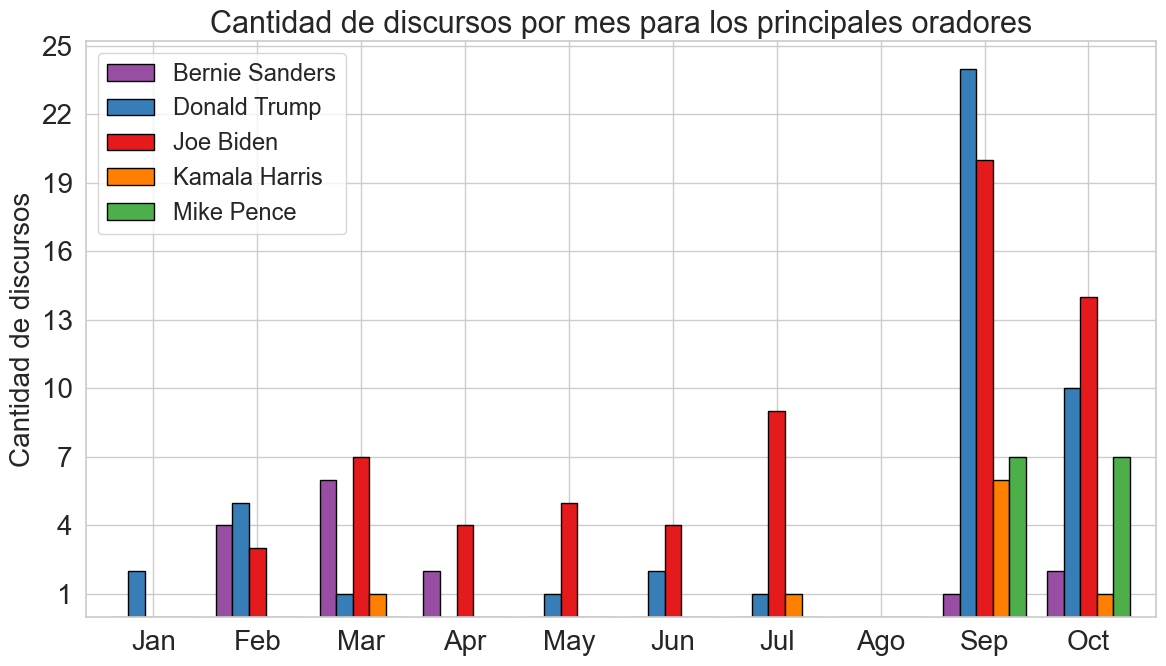

In [ ]:
# TODO: Visualización de los discursos de cada candidato a lo largo del tiempo 
Meses = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Ago", "Sep", "Oct"] #La escala temporal seleccionada es mensual. 
cantidad_disc_por_mes = {}  #Creo un diccionario que incluirá la cantidad de discursos por mes de cada candidato
for month in Meses:
# Quiero quedarme con la cantidad de discursos por mes en Meses
    df_mes = df_speeches_top_5_df[df_speeches_top_5_df['date'].str.contains(month, na=False)] #checks if "Oct" appears in the string and ignores missing values
    cantidad_disc_por_mes[month] = df_mes['speaker'].value_counts()


#Generar un grafico de barras que tenga cantidad de discursos por mes para cada candidato
df_cantidad = pd.DataFrame(cantidad_disc_por_mes)  # Creo un DataFrame para facilitar la creación del gráfico de barras.
print(df_cantidad)  #Los NaN implican que el candidato no dio un discurso en ese mes.

# Lista de candidatos
candidatos = df_speeches_top_5_df['speaker'].unique()

# Crear una paleta fija basada en Set2
base_palette = sns.color_palette("Set1", n_colors=len(candidatos))
custom_palette = dict(zip(candidatos, base_palette))

# Gráfico de barras agrupado
ax = df_cantidad.T.plot(kind='bar', figsize=(12, 7), width=0.8, edgecolor='black', color=[custom_palette[speaker] for speaker in df_cantidad.index])

# Título y etiquetas
plt.title("Cantidad de discursos por mes para los principales oradores", fontsize=22)
plt.ylabel("Cantidad de discursos", fontsize=20)
plt.yticks(ticks=range(1, 27,3), labels=range(1, 27,3), rotation=0, fontsize=20)
plt.xticks(rotation=0, fontsize=20)
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', fontsize=17)

plt.tight_layout()
plt.show()  

In [ ]:
# Observar la cantidad de discursos por location de cada speaker
most_visited_locations = df_speeches_top_5_df['location'].value_counts().head(10)  #Observar la cantidad de discursos por location de cada candidato

cantidad_disc_por_location = {}  #Creo un diccionario que incluirá la cantidad de discursos por mes de cada candidato
for location in most_visited_locations.index:
# Quiero quedarme con la cantidad de discursos por mes en Meses
    df_location = df_speeches_top_5_df[df_speeches_top_5_df['location'].str.contains(location, na=False)] #checks if "Oct" appears in the string and ignores missing values
    cantidad_disc_por_location[location] = df_location['speaker'].value_counts()
df_cantidad_location = pd.DataFrame(cantidad_disc_por_location)
df_cantidad_location
#Visuallizar los datos de discurso por location de cada candidato que no sea un grafico de barras
df_cantidad_location = df_cantidad_location.fillna(0)  # Cambia los NaN por 0 para poder graficar

#Generar un grafico de torta que ilustre la proporción de discuros Virtuales por cada candidato
location = df_cantidad_location.columns[0] #Quiero quedarme con los discursos Virtuales.
df_cantidad_location[location].plot(kind='pie', autopct='%1.1f%%', figsize=(6,6), title=f"Distribución de discursos en {location}")
plt.ylabel("")
plt.show()

#Generar un grafico de torta que tenga las locaciones más frecuentes de los discursos
plt.figure(figsize=(8, 8))
plt.pie(most_visited_locations, labels=most_visited_locations.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribución total de discursos por las 10 locations más frecuentes")
plt.axis('equal')  # Hace el gráfico circular
plt.tight_layout()
plt.show()


In [ ]:
# Obtener los 10 locations más frecuentes
most_visited_locations = df_speeches_top_5_df['location'].value_counts()
print(most_visited_locations)
# Inicializar contadores
conteo_virtual = 0
conteo_foxnews = 0
conteo_presenciales = 0

medios_televisivos = ["Fox News", "ABC", "NBC", "CNN"]

# Hago una división en discursos Virtuales, televisivos y presenciales
for location, count in most_visited_locations.items():
    if "Virtual" in location:
        conteo_virtual += count
    elif any(medio in location for medio in medios_televisivos):
        conteo_foxnews += count
    else:
        conteo_presenciales += count

# Crear diccionario con los datos agrupados
conteos_agrupados = {
    "Virtual": conteo_virtual,
    "Televisivos": conteo_foxnews,
    "Presenciales": conteo_presenciales
}

colors = sns.color_palette("Set1", n_colors=len(conteos_agrupados))
# Gráfico de torta con la proporción de discursos Virtuales, Fox News y Presenciales
plt.figure(figsize=(6, 6))
plt.pie(conteos_agrupados.values(), labels=conteos_agrupados.keys(), autopct='%1.1f%%', startangle=140, pctdistance=0.75, textprops={'fontsize': 18}, colors=colors, wedgeprops={'edgecolor': 'black'})
plt.show()


In [ ]:
# Asegurar que la columna 'date' es de tipo datetime
df_speeches_top_5_df['date'] = pd.to_datetime(df_speeches_top_5_df['date'])

# Definir fecha de corte: 1 de julio
fecha_corte = pd.to_datetime('Jul 1, 2020')  # Cambiá el año si es otro

# Separar el DataFrame
df_antes_julio = df_speeches_top_5_df[df_speeches_top_5_df['date'] < fecha_corte]
df_despues_julio = df_speeches_top_5_df[df_speeches_top_5_df['date'] >= fecha_corte]

# Función para agrupar discursos por tipo de location
def contar_tipos(df):
    conteo_virtual = 0
    conteo_foxnews = 0
    conteo_presenciales = 0
    medios_televisivos = ["Fox News", "ABC", "NBC", "CNN"]
    
    for location, count in df['location'].value_counts().items():
        if "Virtual" in location:
            conteo_virtual += count
        elif any(medio in location for medio in medios_televisivos):
            conteo_foxnews += count
        else:
            conteo_presenciales += count
    return {
        "Virtual": conteo_virtual,
        "Televisivos": conteo_foxnews,
        "Presenciales": conteo_presenciales
    }

# Obtener conteos para ambos periodos
conteos_antes = contar_tipos(df_antes_julio)
conteos_despues = contar_tipos(df_despues_julio)

# Graficar los dos gráficos de torta lado a lado
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].pie(conteos_antes.values(), labels=conteos_antes.keys(), autopct='%1.1f%%', startangle=140, textprops={'fontsize': 20}, colors=colors, wedgeprops={'edgecolor': 'black'})
axs[0].set_title('Antes de julio', fontsize=20)

axs[1].pie(conteos_despues.values(), labels=conteos_despues.keys(), autopct='%1.1f%%', startangle=140, textprops={'fontsize': 20}, colors=colors, wedgeprops={'edgecolor': 'black'})
axs[1].set_title('Desde julio', fontsize=20)

plt.tight_layout()
plt.show()
df_despues_julio

## Limpieza de Texto y Conteo de Palabras

In [209]:
# En los discursos se observa la presencia de diálogos entre los candidatos y agentes externos (entevistadores, multitudes, etc.) Dado que únicamente interesa lo que 
# efectivamente dice el candidato, se eliminará todo lo no dicho por él, así como todas las estampas de tiempo que correspondientes a las transcripciones.

#Dentro de los discursos, y en sus transcripciones, a los candidatos se los menciona de distintas formas. Nos interesa quedarnos con todo lo que dice el candidato, sea como sea 
# que se lo nombre. 
aliases = {
    "Donald Trump": ["Donald Trump", "President Trump", "Mr. Trump", "President Donald J. Trump"],
    "Joe Biden": ["Joe Biden", "President Biden", "Mr. Biden"],
    "Mike Pence": ["Mike Pence", "Vice President Pence", "Mr. Pence"],
    "Kamala Harris": ["Kamala Harris", "Senator Harris", "Mrs. Harris"],
    "Bernie Sanders": ["Bernie Sanders", "Senator Sanders", "Mr. Sanders"]
}

def extract_candidate_speech(text, candidate):
    valid_aliases = aliases.get(candidate, [])

    # Captura encabezados como "Nombre del candidato: (HH:MM:SS)" o "(MM:SS)"
    pattern = re.compile(r"^(.*?):\s*\((\d{1,2}:)?\d{1,2}:\d{2}\)\s*\n", re.MULTILINE)

    matches = list(pattern.finditer(text))  # busco todas las coincidencias de pattern en el texto. finditer analiza el texto buscando las coincidencias y devuelve la posición en el texto donde se encuentra el pattern.
    speeches = []

    for i, match in enumerate(matches):  #Itero en todas las coincidencias
        
        speaker = match.group(1).strip() # Devuelve la persona que habla (candidato o audiencia o cualquier otra persona que habló.)
        
        start = match.end() #Devuelve el índice del primer caracter posterior al pattern. 
        
        end = matches[i + 1].start() if i + 1 < len(matches) else len(text) #Devuelve el índice del primer caracter previo al sigueinte pattern.
        
        speech_text = text[start:end].strip()  #Se queda con el texto de los discursos (todo lo posterior a los encabezados)
        
        if speaker in valid_aliases: # A partir de aqui me quedo solo con el texto de los candidatos.
            # Elimina etiquetas como [inaudible 00:06:17], [crosstalk 01:02:33], etc.
            clean_speech = re.sub(r"\[[^\]]*\d{1,2}:\d{2}(?::\d{2})?\]", "", speech_text) # Quito ciertas estructuras con la función re.sub()
            
            speeches.append(clean_speech.strip())

    return "\n".join(speeches) # Devuelvo las partes del discurso dichas por el candidato, separadas por párrafos (\n).

# Aplicamos la limpieza de partes del discurso que no nos interesan. La aplicación se hace sobre cada fila del DataFrame.
df_speeches_top_5_df["pre_processed_text"] = df_speeches_top_5_df.apply(
    lambda row: extract_candidate_speech(row["text"], row["speaker"]),
    axis=1
)

# Guardamos el resultado en un csv para luego analizar cómo se generó el clean_text.
# df_speeches_top_5_df["pre_processed_text"].to_csv("pre_processed_text.csv", index=False) 

# Analizo que haya funcionado correctamente.
print(df_speeches_top_5_df.loc[10,"pre_processed_text"])

Hello, Johnstown. Thank you very much. This is going to be a great evening. Incredible to be back in Pennsylvania, the proud home of American independence, the American constitution and American freedom. That’s true. Huh? What a history. And 21 days days from now, we’re going to win the Commonwealth of Pennsylvania and we’re going to win four more years in the White House. This election is a simple choice. If Biden wins, China wins, all these other countries win. We get ripped off by everybody. If we win, you win, Pennsylvania wins and America wins, very simple. For years, the selfish and corrupt political class betrayed the people of Pennsylvania, you know that, and the people of our country. Career politicians like Joe Biden lied to you. I don’t think he knew he was even lying. You want to know the truth. He’s gone. He’s shot folks. I hate to tell you, he’s shot. He abused you, he crushed you, your dreams and outsourced your jobs to China and distant lands all over the world.
As a Se

C:\Users\PC\AppData\Local\Temp\ipykernel_32480\1710168154.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_speeches_top_5_df["pre_processed_text"] = df_speeches_top_5_df.apply(


In [ ]:
# Limpieza del texto: Interesa quitar todos los signos de puntuación, pasar el texto a minúsculas y eliminar contracciones.

def expand_contractions(text):   # Función para eliminar contracciones, basado en una lista de contracciones y sus respectivas palabras completas.
    contractions = {
        r"\bcan’t\b": "cannot",   #con el r indico que es una cadena cruda, por ende el \b me separa la palabra can't de otras palabras que la contengan.
        r"\bwon’t\b": "will not",
        r"\bit’s\b": "it is",
        r"\bi’m\b": "i am",
        r"\bi’ve\b": "i have",
        r"\bi’d\b": "i would",
        r"\bi’ll\b": "i will",
        r"\byou’re\b": "you are",
        r"\byou’ve\b": "you have",
        r"\byou’d\b": "you would",
        r"\byou’ll\b": "you will",
        r"\bhe’s\b": "he is",
        r"\bshe’s\b": "she is",
        r"\bthey’re\b": "they are",
        r"\bwe’re\b": "we are",
        r"\bdon’t\b": "do not",
        r"\bdidn’t\b": "did not",
        r"\bdoesn’t\b": "does not",
        r"\bwasn’t\b": "was not",
        r"\bweren’t\b": "were not",
        r"\bcouldn’t\b": "could not",
        r"\bshouldn’t\b": "should not",
        r"\bwouldn’t\b": "would not",
        r"\bthat’s\b": "that is",
        r"\bthere’s\b": "there is",
        r"\bwhat’s\b": "what is",
        r"\bwho’s\b": "who is",
        r"\blet’s\b": "let us",
        r"\bisn’t\b": "is not",
        r"\baren’t\b": "are not",
        r"\bgonna\b": "going to",
        r"\bwanna\b": "want to",
        r"\bgotta\b": "got to"
    }
    for pattern, repl in contractions.items():
        text = re.sub(pattern, repl, text)
    return text

def clean_text(df, column_name):
    
    # Eliminar primeras palabras hasta el primer "\n"
    result = df[column_name].str.replace(r"^[^\n]*\n", "", regex=True)
    
    # Convertir todo a minúsculas
    result = result.str.lower()
    
    # Expandir contracciones
    result = result.apply(expand_contractions)

    # Reemplazar signos de puntuación faltantes
    for punc in ["[", "]", "\n", ",", ":", "?", "(", ")", "!", ".", "...",";", "¿", "¡", "“", "”", '"', "'", "‘", "’", "{", "}", "%","$","0","1","-","/"]: # agregue: "%" "(", ")", "!", ".", ";", "¿", "¡", "“", "”", '"', "'", "‘", "’", "{", "}"
        result = result.str.replace(punc, " ")

    # Reemplazar saltos de línea por espacios (por si quedaron después del paso 1)
    result = result.str.replace(r"\n", " ", regex=True)

    # Eliminar múltiples espacios con uno solo (normaliza frases)
    result = result.str.replace(r"\s+", " ", regex=True)

    # Eliminar espacios al inicio o final
    result = result.str.strip()

    return result

# Crear una nueva columna CleanText a partir de 'text'
df_speeches_top_5_df.loc[:, "CleanText"] = clean_text(df_speeches_top_5_df, "pre_processed_text")
df_speeches_top_5_df.loc[1, "CleanText"]

# Parte 2: Conteo de Palabras y Visualizaciones

 ## Candidatos con mayor cantidad de palabras

In [ ]:
#--------------------------------Obtener la cantidad de palabras por discurso---------------------------------------------------------------# 

# Convierte párrafos en listas "palabra1 palabra2 palabra3" -> ["palabra1", "palabra2", "palabra3"]
df_speeches_top_5_df["WordList"] = df_speeches_top_5_df.loc[:,"CleanText"].str.split()

# contar palabras en la columna wordlist para cada discurso
df_speeches_top_5_df.loc[:,"WordCount"] = df_speeches_top_5_df["WordList"].str.len()

# ver cantidad de palabras por discurso
df_speeches_top_5_df[["CleanText", "WordList", "WordCount"]]

#--------------------------------Obtener la cantidad de veces que se menciona cada palabra dicha por cada candidato-------------------------# 

# Explota la columna WordList
df_exploded = df_speeches_top_5_df[["speaker", "WordList"]].explode("WordList")
# Agrupa y cuenta cuántas veces se usa cada palabra por speaker
grouped_wordlist = df_exploded.groupby(["speaker", "WordList"]).size().reset_index(name="count") # obtengo un DataFrame que tiene la cantidad de veces que cada palabra fue utilizada por cada candidato (columna count).
print(grouped_wordlist) #Obtengo un DataFrame que tiene la cantidad de veces que cada palabra fue utilizada por cada candidato.


In [ ]:
df_candidates_words = pd.DataFrame()  # Inicializamos como DataFrame vacío

# Recorremos cada speaker y seleccionamos sus top 5 palabras más frecuentes
for speaker in grouped_wordlist["speaker"].unique():
    top_words = (
        grouped_wordlist[grouped_wordlist["speaker"] == speaker] # Filtramos por el speaker actual
        .sort_values("count", ascending=False) # Ordenamos por cantidad de veces que se repite la palabra
        .head(5) # Seleccionamos las 5 palabras más frecuentes
        .reset_index(drop=True) # Reseteamos el índice para evitar problemas al concatenar
    )
    top_words["speaker"] = speaker  # Agregamos columna con el nombre del speaker
    df_candidates_words = pd.concat([df_candidates_words, top_words], ignore_index=True)

df_candidates_words # DataFrame con el top 5 palabras de cada candidato

# Gráfico de barras para las palabras más frecuentes por candidato	

# las palabras pueden repetirse entre candidatos, pero cada barra debe reflejar cuántas veces la dijo ese candidato. Para que eso funcione y las barras no se apilen, necesitamos 
# que el eje x distinga cada ocurrencia de una palabra por cada candidato, incluso si la palabra se repite.
#La solución: mantenemos solo la palabra en el eje x (para mostrarla), pero usamos el índice del DataFrame como orden, de forma que cada barra sea única.

# Graficar con el índice como eje x para que no se colapsen
plt.figure(figsize=(14, 6))
sns.barplot(
    data=df_candidates_words,
    x=df_candidates_words.index,         # .index hace que cada barra sea única osea dos palabras iguales si tienen distinto index se grafican independientes
    y='count',
    hue='speaker',
    dodge=False,
    edgecolor='black',
    palette=custom_palette  
)

# Reemplazar los valores del eje x por las palabras
plt.xticks(ticks=df_candidates_words.index, labels=df_candidates_words['WordList'], rotation=45, ha='right')
plt.xlabel("Palabra", fontsize=20)
plt.xticks(rotation = 45,fontsize=15)
plt.ylabel("Cantidad de veces expresada", fontsize=20)
plt.yticks(fontsize=15)
plt.title("Top 5 palabras más frecuentes por candidato" , fontsize=22)
#plt.grid(axis='y', linestyle='--', alpha=0.7)  # Añadir líneas de cuadrícula en el eje y
plt.legend(title="Candidato", fontsize=12, title_fontsize=13, loc='upper left', bbox_to_anchor=(0, 1))
plt.tight_layout()
plt.show()

df_candidates_words

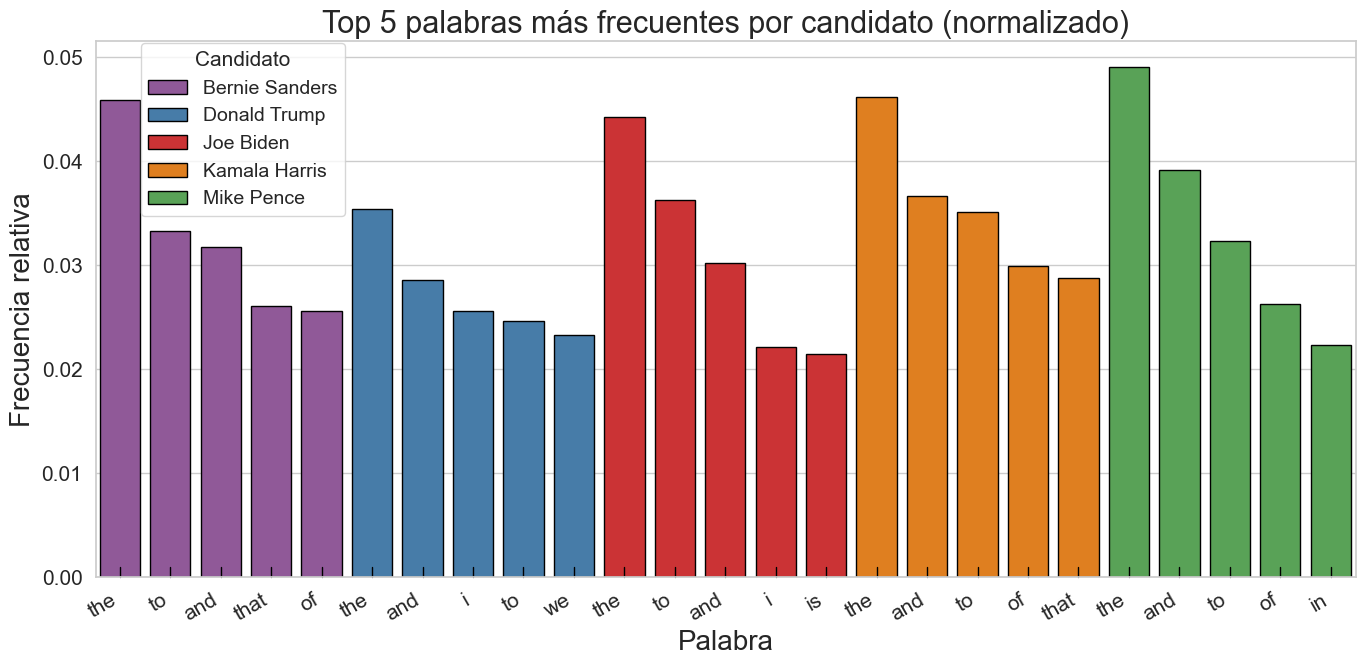

In [174]:
# Total de palabras habladas por cada candidato
total_words_by_speaker = grouped_wordlist.groupby("speaker")["count"].sum().to_dict()

# Añadir columna con frecuencia relativa
df_candidates_words["relative_freq"] = df_candidates_words.apply(
    lambda row: row["count"] / total_words_by_speaker[row["speaker"]],
    axis=1
)
plt.figure(figsize=(14, 7))
sns.barplot(
    data=df_candidates_words,
    x=df_candidates_words.index,
    y="relative_freq",
    hue="speaker",
    dodge=False,
    edgecolor="black",
    palette=custom_palette
)

plt.xticks(ticks=df_candidates_words.index, labels=df_candidates_words['WordList'], rotation=30, ha='right')
plt.xlabel("Palabra", fontsize=20)
plt.ylabel("Frecuencia relativa", fontsize=20)
plt.title("Top 5 palabras más frecuentes por candidato (normalizado)", fontsize=22)
plt.xticks(rotation=30, fontsize=15, ha='right')
# Dibujar una rayita pequeña bajo cada barra
for x in df_candidates_words.index:
    plt.plot([x, x], [0, 0.001], color='black', linewidth=1, clip_on=False)
plt.xlim(-0.48, 24.5)
plt.yticks(fontsize=15)
plt.legend(title="Candidato", fontsize=14, title_fontsize=15, loc='upper left', bbox_to_anchor=(0.028, 1.015))
plt.tight_layout()
plt.show()


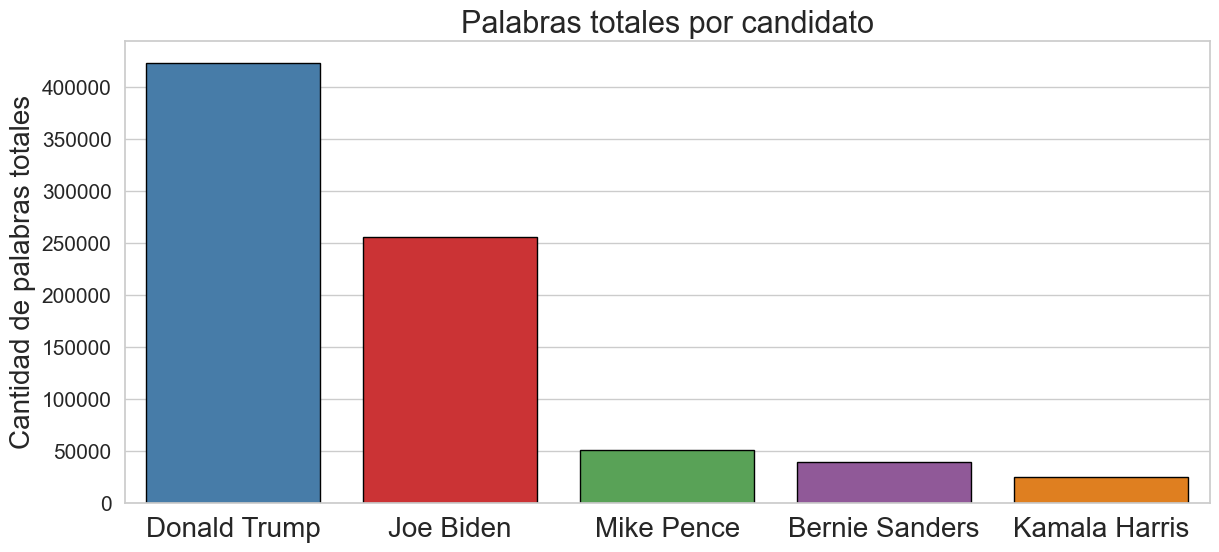

In [181]:
# TODO: Busque los candidatos/as con mayor cantidad de palabras.

# sumar wordcount por speaker / esto nos da la cantidad de palabras totales por candidato
totalWords_df = df_speeches_top_5_df.groupby('speaker')['WordCount'].sum().reset_index(name='TotalWords').sort_values(by='TotalWords', ascending=False)
                                                                


# Graficar la cantidad de palabras totales por candidato
plt.figure(figsize=(14, 6))
sns.barplot(
    data=totalWords_df,
    x=totalWords_df['speaker'],
    y=totalWords_df['TotalWords'],
    hue='speaker',  # Añadido para distinguir los candidatos       
    dodge=False,
    edgecolor='black',
    palette=custom_palette  
)
# Quiero que los colores se respeten del gráfico anterior, por lo que los defino manualmente
colors = sns.color_palette("Set2", n_colors=len(totalWords_df['speaker'].unique()))

plt.xticks(ticks=totalWords_df['speaker'], rotation=0, ha='center', fontsize=20)
plt.yticks(fontsize=15)
plt.xlabel("", fontsize=20)
plt.ylabel("Cantidad de palabras totales", fontsize=20)
plt.title("Palabras totales por candidato", fontsize=22)
plt.show() 

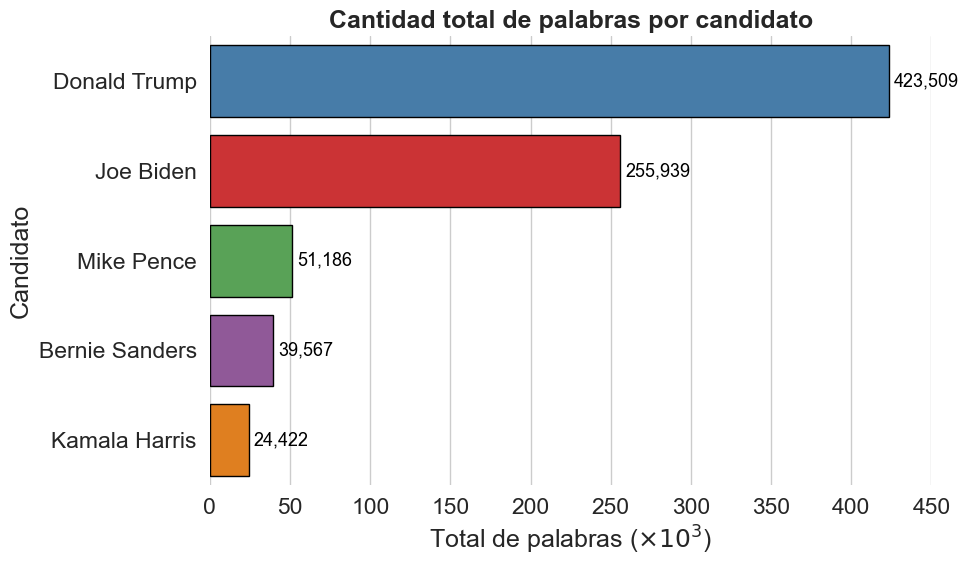

In [182]:
# Estilo más formal
sns.set(style="whitegrid", font_scale=1.5)


plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    data=totalWords_df,
    x='TotalWords',
    y='speaker',
    hue = 'speaker',
    palette= custom_palette,
    edgecolor = 'black'
)

# Agregar valores al final de las barras
for i, (value, name) in enumerate(zip(totalWords_df["TotalWords"], totalWords_df["speaker"])):
    plt.text(value + 3000, i, f"{value:,}", va='center', fontsize=13, color='black')

plt.title("Cantidad total de palabras por candidato", weight='bold')
plt.xlabel(r"Total de palabras ($\times 10^3$)")
xticks_values = plt.xticks()[0]  # Obtener los valores actuales de los xticks
plt.xticks(ticks=xticks_values, labels=[f"{int(x/1e3)}" for x in xticks_values])

# plt.xticks(fontsize = 17)
plt.ylabel("Candidato")
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


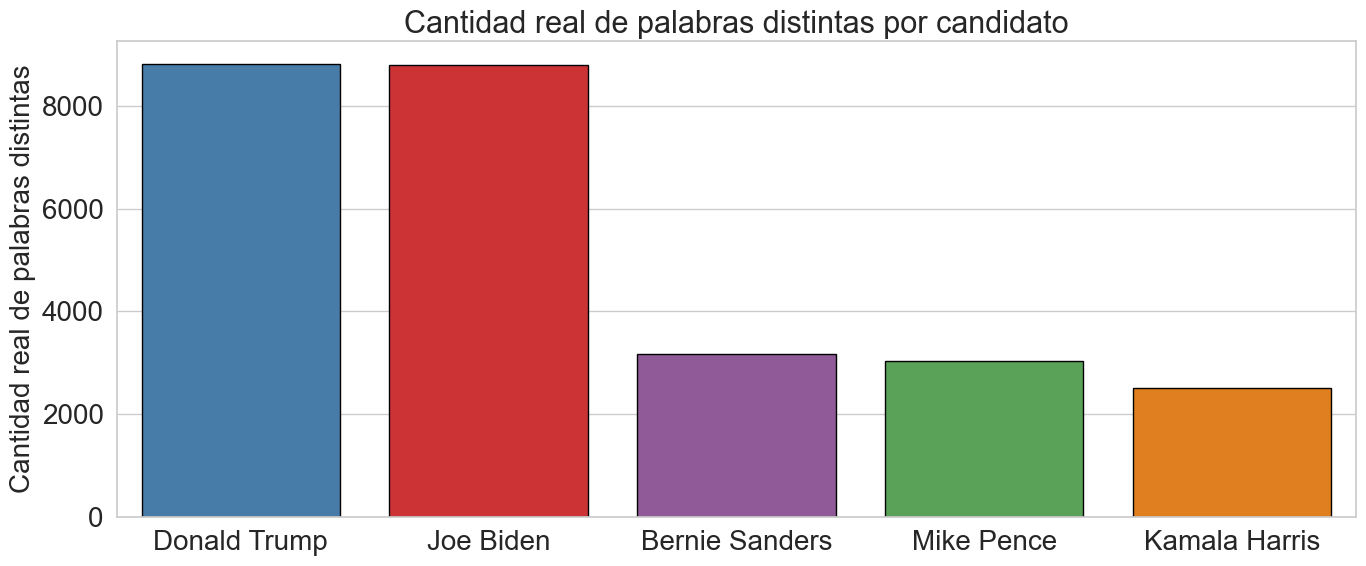

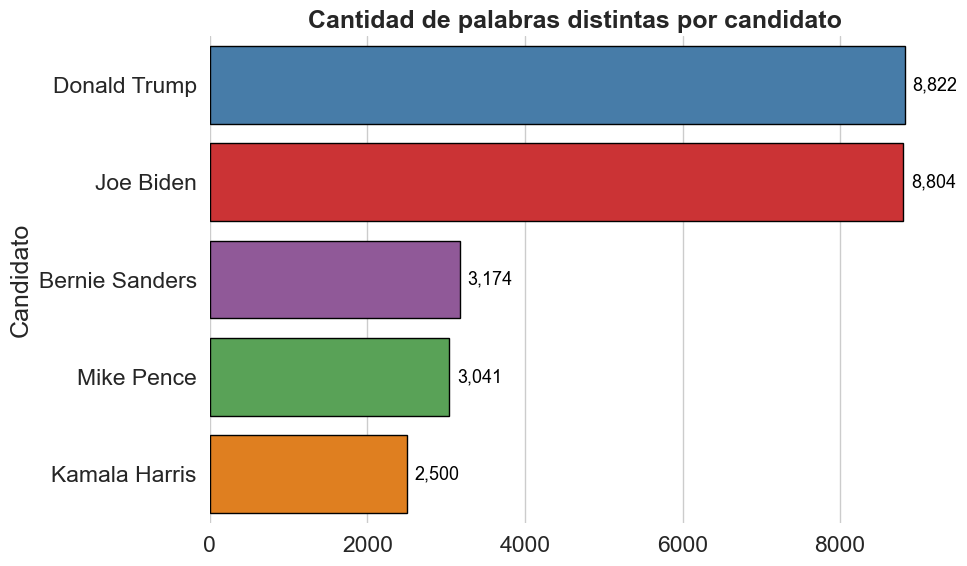

In [183]:

# ANALIZA LA CANTIDAD DE PALABRAS ÚNICAS POR CANDIDATO
# Agrupar por speaker y unir todas las palabras de todos los discursos
unique_words_per_speaker = (
    df_speeches_top_5_df
    .groupby('speaker')['WordList']   #esta línea agrupa todas las palabras de todos los discursos por speaker
    .apply(lambda lists: len(set(word for sublist in lists for word in sublist)))  # Con las palabras en una única lista, aplico el set para elminiar duplicados y cuento la cantidad de palabras únicas que hay.
    .reset_index(name='UniqueWords')
    .sort_values(by='UniqueWords', ascending=False)
)

# Graficar
plt.figure(figsize=(14, 6))
sns.barplot(
    data=unique_words_per_speaker,
    x='speaker',
    y='UniqueWords',
    hue='speaker',
    dodge=False,
    edgecolor='black',
    palette=custom_palette
)


plt.xticks(ticks=unique_words_per_speaker['speaker'],rotation=0, ha='center', fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("", fontsize=20)
plt.ylabel("Cantidad real de palabras distintas", fontsize=20)
plt.title("Cantidad real de palabras distintas por candidato", fontsize=22)
plt.tight_layout()
plt.show()

# Graficar
sns.set(style="whitegrid", font_scale=1.5)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=unique_words_per_speaker,
    x='UniqueWords',
    y='speaker',
    hue='speaker',
    dodge=False,
    edgecolor='black',
    palette=custom_palette
)
sns.despine(left=True, bottom=True, right=True, top=True)

# Agregar valores al final de las barras
for i, (value, name) in enumerate(zip(unique_words_per_speaker["UniqueWords"], unique_words_per_speaker["speaker"])):
    plt.text(value + 100, i, f"{value:,}", va='center', fontsize=13, color='black')

# plt.yticks(fontsize=20)
plt.xlabel("", fontsize=20)
plt.ylabel("Candidato")
plt.title("Cantidad de palabras distintas por candidato", weight='bold')
plt.tight_layout()
plt.show()


In [ ]:
aliases = {
    "Donald Trump": ["Donald Trump", "President Trump", "Mr. Trump", "President Donald J. Trump"],
    "Joe Biden": ["Joe Biden", "President Biden", "Mr. Biden"],
    "Mike Pence": ["Mike Pence", "Vice President Pence", "Mr Pence"],
    "Kamala Harris": ["Kamala Harris", "Senator Harris", "Mrs. Harris"],
    "Bernie Sanders": ["Bernie Sanders", "Senator Sanders", "Mr. Sanders"]
}

def extract_candidate_speech(text, candidate):
    # Lista de alias aceptados para este candidato
    valid_aliases = aliases.get(candidate, [])
    
    # Construimos una expresión regular para capturar todos los turnos de habla
    # Ejemplo: "Donald Trump: (22:12)\nContenido"
    pattern = re.compile(r"(.*?):\s*\(\d{1,2}:\d{2}\)\s*\n")

    # Encontramos todas las posiciones de encabezados de turno de habla
    matches = list(pattern.finditer(text))

    speeches = []

    for i, match in enumerate(matches):
        speaker = match.group(1).strip()
        start = match.end()
        end = matches[i+1].start() if i+1 < len(matches) else len(text)
        speech_text = text[start:end].strip()

        # Si el speaker es uno de los alias del candidato, lo guardamos
        if speaker in valid_aliases:
            speeches.append(speech_text)

    # Devolvemos el texto limpio, sin encabezados ni otros hablantes
    return "\n".join(speeches)

df_speeches_top_5_df["clean_text"] = df_speeches_top_5_df.apply(
    lambda row: extract_candidate_speech(row["text"], row["speaker"]),
    axis=1
)

# Verificamos que el texto limpio se haya creado correctamente
print(df_speeches_top_5_df.loc[12,"clean_text"])
# Exporta el DataFrame completo (o puedes elegir solo algunas columnas)
df_speeches_top_5_df.to_csv("cleaned_speeches.csv", index=False)


C:\Users\PC\AppData\Local\Temp\ipykernel_6588\526334676.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_speeches_top_5_df["clean_text"] = df_speeches_top_5_df.apply(


Hello, Wisconsin. To Congressman Steil, Congressman Grothman, to Dave Ball, and all the great men and women of Weldall Manufacturing. It is great to be back in the Badger State.
I know this is Packer’s Country.
With that 4-0 record, but judging from the flags and the yard signs I saw on the way here, this is also Trump Country.
But I appreciate you all coming out today. I really do.
It’s great to be here with so many friends-
Especially great to back to be in the home district of a rising star in the Republican Party, a man who had big shoes to fill and he’s gone and filled them. He’s emerged as one of the great conservative champions in the House of Representatives. With a hometown crowd, give a round of applause to Congressman Brian Steil style for me. What a great guy. Where are you Brian? Thank you Brian.
While you’re at it, thank Congressman Glenn Grothman for coming out today. He is a tenacious, principled conservative. But I got to tell you we’re here for one reason, and one rea

In [ ]:
# Diccionario de sinónimos
candidate_aliases = {
    "joe biden": ["vice president biden", "vicepresident biden", "senator biden", "biden", "joe biden"],
    "donald trump": ["president trump", "trump", "donald trump"],
    "mike pence": ["mike pence", "vice president pence"],
    "bernie sanders": ["bernie sanders", "senator sanders", "mr sanders"],
    "kamala harris": ["kamala harris", "senator harris", "mrs harris"]
}

def normalize_candidate_mentions(text, alias_dict):
    if pd.isna(text):
        return text
    for canonical_name, aliases in alias_dict.items():
        # Ordenar de mayor a menor longitud para evitar que "joe" reemplace antes que "joe biden"
        sorted_aliases = sorted(aliases, key=len, reverse=True)
        for alias in sorted_aliases:
            pattern = fr"\b{re.escape(alias)}\b"
            text = re.sub(pattern, canonical_name, text, flags=re.IGNORECASE) # busco el alias y lo sustituyo por el nombre del candidato
    return text


# Aplicamos la normalización
df_speeches_top_5_df["CleanText_normalized"] = df_speeches_top_5_df["CleanText"].apply(
    lambda t: normalize_candidate_mentions(t, candidate_aliases)
)
# Obtener la lista de speakers únicos en minúsculas
speakers = df_speeches_top_5_df["speaker"].str.lower().unique()
mentions_matrix = pd.DataFrame(0, index=speakers, columns=candidate_aliases.keys())

# Contar menciones reales usando CleanText_normalized
for candidate in candidate_aliases.keys():
    for speaker in speakers:
        discursos_speaker = df_speeches_top_5_df[df_speeches_top_5_df["speaker"].str.lower() == speaker]
        total_mentions = discursos_speaker["CleanText_normalized"].str.count(fr"\b{candidate}\b").sum()
        mentions_matrix.loc[speaker, candidate] = total_mentions
mentions_matrix

#Visualizacion
plt.figure(figsize=(14, 8))
sns.heatmap(mentions_matrix, annot=True, cmap="Reds", fmt="d")
plt.title("Menciones entre candidatos")
plt.xticks(rotation=0)
plt.show()


C:\Users\PC\AppData\Local\Temp\ipykernel_32480\2810671086.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_speeches_top_5_df["CleanText_normalized"] = df_speeches_top_5_df["CleanText"].apply(


,joe biden,donald trump,mike pence,bernie sanders,kamala harris
joe biden,73,471,0,8,6
donald trump,830,348,31,39,10
mike pence,249,307,0,5,37
bernie sanders,60,124,0,1,1
kamala harris,36,31,0,0,1
